# Simple Linear Regression Project
This Notebook gathers all the code required to implent a simple Linear Regression using Scikit-Learn:

## Table of Contents
1. Importing the Required Libraries
2. Downloading the Data
3. Understanding and Exploring the Data
4. Split the Data in Train/Test Datasets
5. Build the Simple Regression Model
6. Model Evaluation

## Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Downloading the Data

In [2]:
df = pd.read_csv("C:/Users/hp/Desktop/Datasets/FuelConsumptionCo2.csv")

## Understanding and Exploring the Data
This project is based on a fuel consumption dataset, **FuelVonsumptio.csv**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

Let's take a quick look at the dataset and get a descriptive summary of it.

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


It's often useful to plot features. 

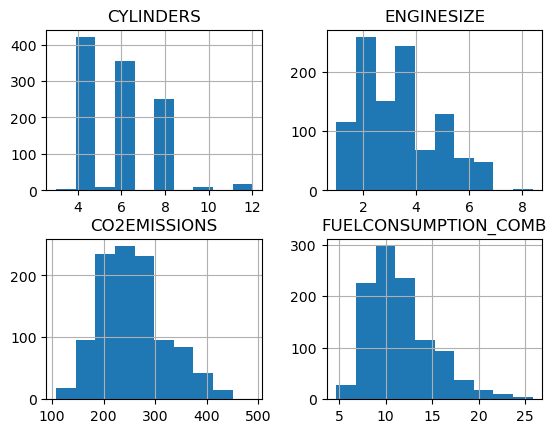

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Let's plot **fuel consumption** vs **CO2 missions**, to see how linear is the relationship between those two specific features.

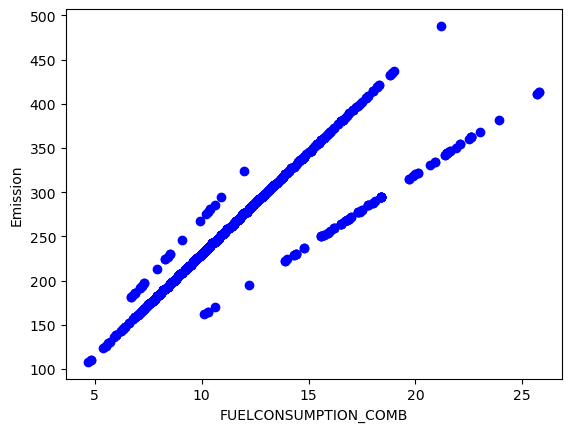

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Now let's plot **engine size** vs **CO2 missions** to see how linear is that relationship.

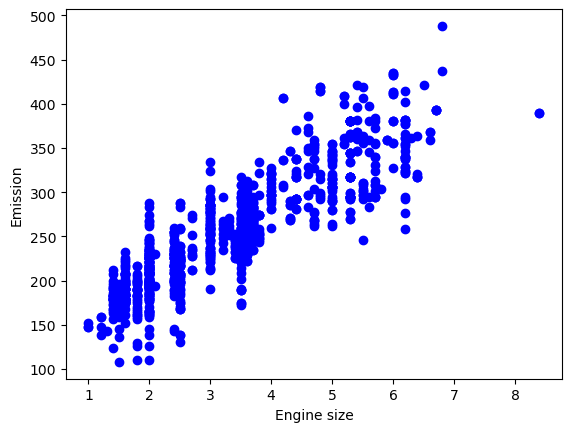

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

It seems the relationship between engine size and CO2 emissions is not as clear. Let's next check CYLINDER vs the Emission, to see how linear is that relationship is.

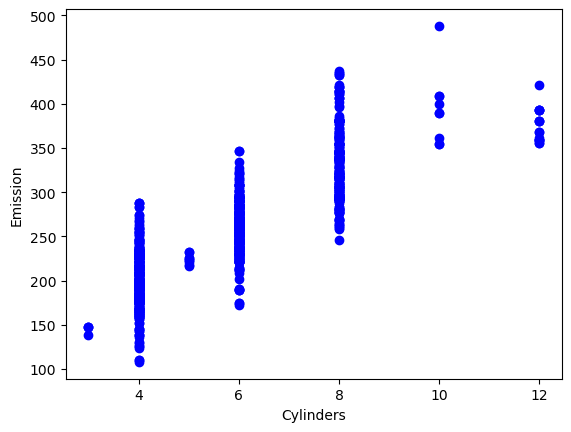

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

## Split the Data in Train/Test Datasets
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, I will train a regression model using the training set and test it with the testing set. This should result in a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset used for training the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

Since I know the outcome of each data point in the testing dataset, this makes the teting set very useful to test with. The  the model has no knowledge of the outcome of the data points in the testing set. So, in essence, it is truly an out-of-sample testing.

Therefore, I will next split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. To that end, I'll create a mask to select random rows using __np.random.rand()__ function. The test set will be the create using the ~ symbol to select the opposite of the mask.

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Build the Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value ŷ using linear approximation. 

**Let's first examine the distribution of the Train dataset**

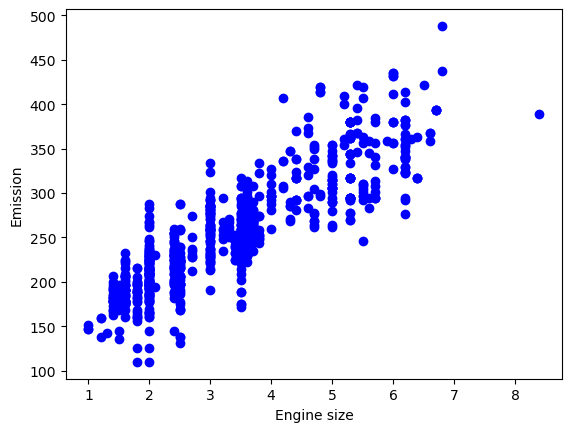

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Now I'll fit the regression model using the *sklearn* linear model packge.

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.61489275]]
Intercept:  [127.18829424]


The Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Since it's a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Following is the **plot line** is fitted over the data.

Text(0, 0.5, 'Emission')

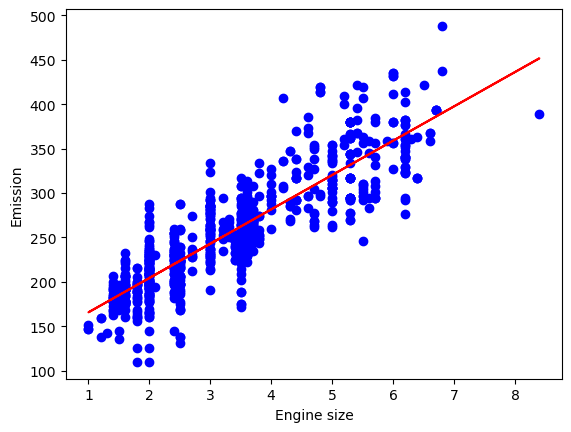

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics...  set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In this project I'll use MSE to calculate the accuracy of our model based on the test

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 23.45
Residual sum of squares (MSE): 926.48
R2-score: 0.79


Let's check the evaluation metrics of regression model trained using the **FUELCONSUMPTION_COMB** feature..

I'll start by selecting FUELCONSUMPTION_COMB as the **train_x** data from the *train* dataframe and then I'll select   FUELCONSUMPTION_COMB as the **test_x** from the *test* dataframe.`

In [15]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

Now train another version of the Linear Regression Model using the newly created train_x and train_y.

In [16]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

Now, let's ask for some predictions using the model's **predict** function and the **test_x** data

In [17]:
predictions = regr.predict(test_x)

Finally, I'll use the new predictions and the test_y data and find the *Mean Absolute Error* value using the **np.absolute** and **np.mean** function as done previously

In [18]:
test_x = np.asanyarray(test[["FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 21.54
Residual sum of squares (MSE): 889.59
R2-score: 0.80


The above shows that the metrics improve when we train using  **FUELCONSUMPTION_COMB** rather than **ENGINESIZE**.

## Thank you for reviewing this project!